# Gradient boosting

Cheryl KOUADIO  
2024-10-18

# Activity 1 : SAMME Algorithm

AdaBoost is a popular boosting algorithm that is used to boost the
performance of decision trees on binary classification problems. It
works by weighting the observations, putting more weight on difficult to
classify instances and less on those already handled well. New weak
learners are added sequentially that focus their training on the more
difficult patterns. The predictions of the weak learners are then
combined through a weighted majority vote to make the final prediction.

Hence, for M weak learners, the final prediction is given by
$g(x) = \sum_{m=1}^{M} \alpha_m g_m(x)$ where $g_m(x)$ is the m-th weak
learner and $\alpha_m$ is the weight associated with the m-th weak
learner. The optimisation problem of AdaBoost is given by:

$$ \underset{\alpha_m, g_m \, (m=1,\dots,M)}{\arg \min} \sum_{i=1}^{N} L\left(y_i, \sum_{m=1}^{M} \alpha_m g_m(x_i)\right) $$

Since, this problem is difficult to solve, AdaBoost uses a forward
stagewise additive modeling approach, with the loss function
$l(y,f(x))=\exp(-yf(x))$, $y \in \{-1,+1\}$. It adds one weak learner at
a time, and at each iteration, it solves the following optimization
problem :

-   1.  Initialize the observation weights $w_i^{(1)} = 1/n$ for
        $i=1,\dots,n$

-   1.  For m=1 to M:

    -   1.  Fit a weak learner $g_m(x)$ to the training data using
            weights $w_i^{(m)}$
    -   1.  Compute the error rate
            $err_m = \sum_{i=1}^{N} w_i^{m} 1(y_i \neq g_m(x_i))$ where
            $I$ is the indicator function
    -   1.  Compute the weight
            $\alpha_m = \frac{1}{2} \log \left(\frac{1-err_m}{err_m}\right)$
    -   1.  Update the weights
            $w_i^{(m+1)} = w_i^{(m)} \exp\left(\alpha_m 1(y_i \neq g_m(x_i))\right)$

In this activity, we will implement the SAMME algorithm. SAMME stands
for Stagewise Additive Modeling using a Multi-class Exponential loss
function. It is a boosting algorithm that is used to boost the
performance of decision trees on multi-class classification problems. It
is a generalization of the AdaBoost algorithm to multi-class
classification problems.

To inspect how the errors and the weights vary with the number of
iterations, we will the function `make_gaussian_quantiles` from
`sklearn`. This function generates a multi-dimensional standard normale
distribution with a given number of samples $n$ per class $K$. We will
generate a dataset of size $n=2000$ with $K=3$ classes and $d=10$
features. We will then train a SAMME classifier on this dataset and plot
the errors and the weights as a function of the number of iterations.

In [1]:
# import make_gaussian_quantiles

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_gaussian_quantiles;
from sklearn.model_selection import train_test_split

# Generate the dataset
X, y = make_gaussian_quantiles(n_samples=2000, n_features=10, n_classes=3)

# Split the dataset into a training and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

## I. Decision Tree

Accuracy:  0.5075

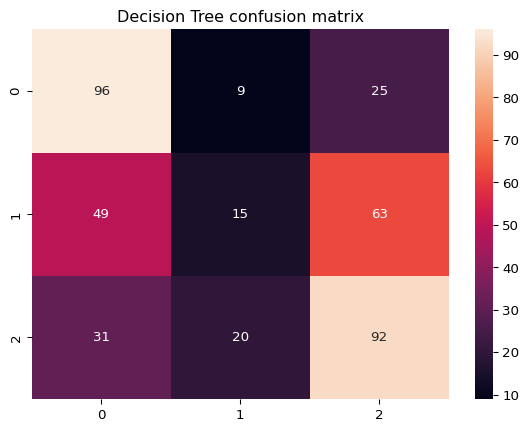

In [2]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Fit normal decision tree
model_tree = DecisionTreeClassifier(max_leaf_nodes=8).fit(X_train, y_train)
y_pred_tree = model_tree.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print("Accuracy: ", accuracy_tree)

cm_tree = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(cm_tree, annot=True)
plt.title('Decision Tree confusion matrix')
plt.show()

## II. SAMME Algorithm (Multi-class AdaBoost with Decision Trees)s

/Users/cherylkouadio/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning:

The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.


Accuracy:  0.7

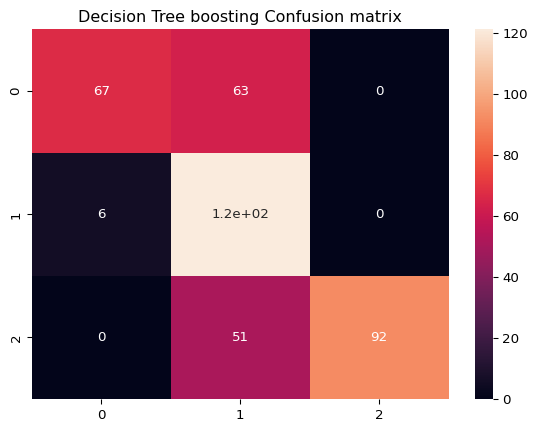

In [3]:
# Run adaboost


# Create and fit an AdaBoosted decision tree
model_adaboost = AdaBoostClassifier(DecisionTreeClassifier(max_leaf_nodes=8),
                         algorithm="SAMME",
                         n_estimators=300).fit(X_train, y_train)

# Predict the test set
y_pred = model_adaboost.predict(X_test)

# Compute the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

#plot with seaborn
sns.heatmap(cm, annot=True)
plt.title('Decision Tree boosting Confusion matrix')
plt.show()

# run adaboost for decision tree with max leaves = 8 

As we can see, the SAMME algorithm performs well on the dataset, than a
single decision tree. In fact, we have an accuracy of 76% for the SAMME
algorithm, while we have an accuracy of 52% for a single decision tree.
If we increase the number of iterations, we can see that the accuracy of
the SAMME algorithm increases, while the accuracy of the decision tree
remains the same.

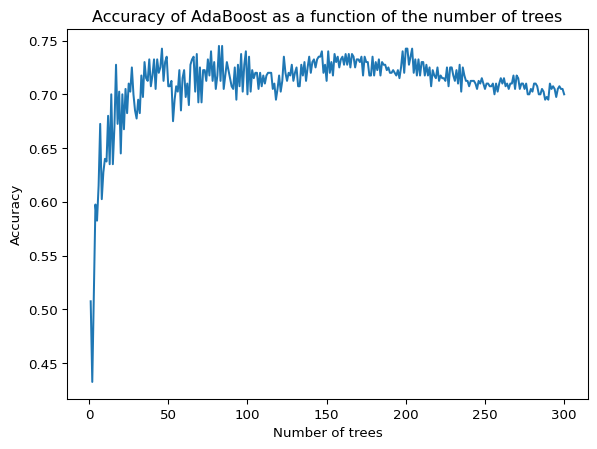

In [4]:
# use of staged_predict
accuracy = []
for y_pred in model_adaboost.staged_predict(X_test):
    accuracy.append(accuracy_score(y_test, y_pred))

plt.plot(range(1, 301), accuracy)
plt.xlabel('Number of trees')
plt.ylabel('Accuracy')
plt.title('Accuracy of AdaBoost as a function of the number of trees')
plt.show()

Regarding the weights and errors at each iteration, we observe that the
weight decreases with the number of iterations, while the error
increases. This is due to the fact that at each iteration, the algorithm
focuses on the difficult instances to classify. Hence, the weight of the
weak learner increases, while the error increases.

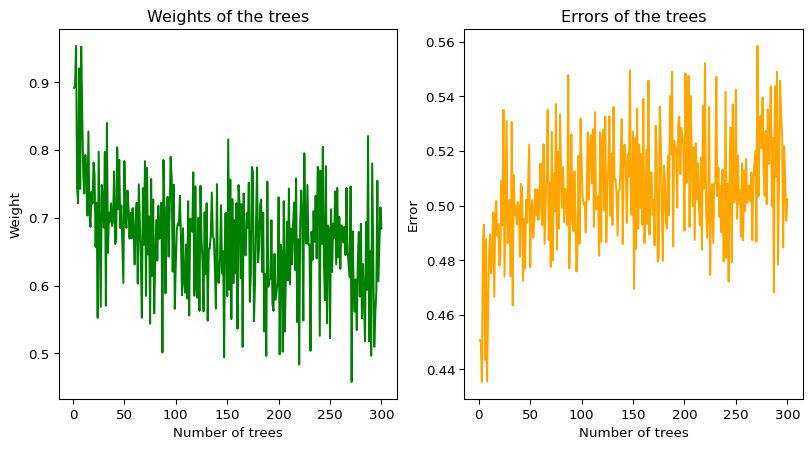

In [5]:
# Visualize how the weights and errors change with the number of trees
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, 301), model_adaboost.estimator_weights_,color='green')
plt.title('Weights of the trees')
plt.xlabel('Number of trees')
plt.ylabel('Weight')

plt.subplot(1, 2, 2)
plt.plot(range(1, 301), model_adaboost.estimator_errors_,color='orange')
plt.xlabel('Number of trees')
plt.ylabel('Error')
plt.title('Errors of the trees')
plt.show()

# Activity 2 : Boosting with not so weak learners

As mentioned earlier, the boosting algorithm uses multiple weak
learners. This is a crucial aspect of the algorithm, as it allows
combining multiple weak learners to create a strong learner. However, we
might be interested in using stronger learners instead of weak ones, and
we could observe that the algorithm performs poorly.

For example, let’s consider boosting with a linear regression as the
base learner. In boosting, we can use the errors in two ways : either
grade and reweight in the training, or either train the model on the
residuals.

At the first iteration, we fit a linear regression to the target
variable in order to obtain the parameters $\beta$:

$$
\beta_{1}^* = \underset{\beta_1}{\arg \min} || Y - X\beta_1 ||^2
$$

This gives us the first learner $g_1(x) = X\beta_1$, where
$\beta_1 = (X^TX)^{-1}X^TY$.

In the following iterations, we fit a linear regression on the residuals
to obtain the parameters $\beta_m$:

$$
\beta_m^* = \underset{\beta_m}{\arg \min} || Y - X\hat{\beta}_{m-1} - X\beta_m ||^2 = \underset{\beta}{\arg \min} || R_{m-1} - X\beta_m ||^2
$$

It’s easy to see that the optimal $\beta_m = 0$, since the residuals are
orthogonal to the previous residuals. Therefore, the optimal
$\beta_m = 0$ and the optimal $g_m(x) = 0$.

For example, when $m=2$, we have the following optimization problem:

$$
\beta_2^* = \underset{\beta_2}{\arg \min} || Y - X\hat{\beta}_{1} - X\beta_2 ||^2 = \underset{\beta_2}{\arg \min} || R_1 - X\beta_2 ||^2
$$

Thus,
$\beta_2 = (X^TX)^{-1}X^TR_1 = (X^TX)^{-1}X^T(Y - X\hat{\beta}_1) = \hat{\beta}_1 - I_d \hat{\beta}_1 = 0$.

This shows that, at the second iteration, the algorithm fails to improve
because the residuals are already orthogonal, meaning the gradient
direction leads to no further improvement. Essentially, this explains
why using a strong learner such as linear regression in boosting can
result in poor performance. In this case, the linear model fits
perfectly in the first iteration, leaving no room for further
improvement, as the residuals contain no additional information.

Boosting algorithms like AdaBoost or Gradient Boosting rely on the fact
that weak learners make small, incremental improvements, allowing the
algorithm to progressively focus on harder-to-classify examples or areas
where the model still has room to learn. By using a strong learner that
perfectly fits the data in the first round, we lose the incremental
learning aspect, which is key to the success of boosting.

# Activity 3 : Xgboost

XGBoost (Extreme Gradient Boosting) is an optimized distributed gradient
boosting library designed to be highly efficient, flexible, and
portable. It implements machine learning algorithms under the Gradient
Boosting framework. XGBoost provides a parallel tree boosting (also
known as GBDT, GBM) that solve many data science problems in a fast and
accurate way. When the dataset is higly correlated, we can still use
XGBoost, as it can handle multicollinearity.

In [6]:
import pandas as pd

data_train = pd.read_csv("Data/mnist_train_small.csv")
data_test = pd.read_csv("Data/mnist_test.csv")

# normalize the data
X_train  = data_train.iloc[:, 1:]/255
y_train = data_train["label"]
X_test  = data_test.iloc[:, 1:]/255
y_test = data_test["label"]

As we can see, the model performs rather well with an accuracy of 0.87
(quite similar to the one obtained with SVM). However, we can see that
the model is not perfect as it makes some mistakes.

Accuracy:  0.8893

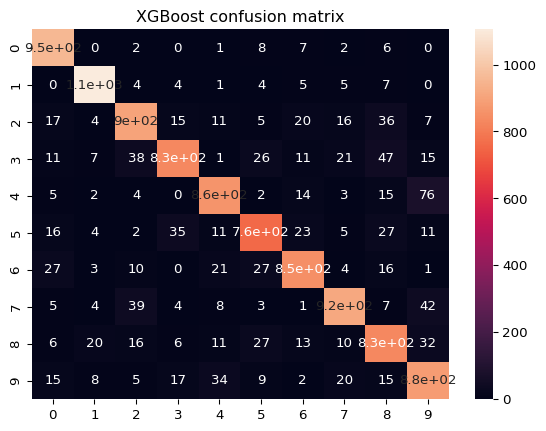

In [7]:
# Train Xgboost on the data
from xgboost import XGBClassifier
model_xgboost = XGBClassifier(colsample_bylevel=0.1,gamma=0.1).fit(X_train, y_train)
y_pred_xgboost = model_xgboost.predict(X_test)
accuracy_xgboost = accuracy_score(y_test, y_pred_xgboost)
print("Accuracy: ", accuracy_xgboost)

cm_xgboost = confusion_matrix(y_test, y_pred_xgboost)
sns.heatmap(cm_xgboost, annot=True)
plt.title('XGBoost confusion matrix')
plt.show()